In [1]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import os
import time

In [2]:
!ls /data/common/trade_data/2019_updated/us_customs_2019_cleaned_ignore_multiple_hscode_FULLDESC

us_customs_2019_ignore_multiple_hscode_not_null_hscode.parq
us_customs_2019_ignore_multiple_hscode_null_hscode.parq


### Load FULL DESC data for 2019 imports

In [3]:
#Load full dataset without nulls
df_no_null = dd.read_parquet('/data/common/trade_data/2019_updated/us_customs_2019_cleaned_ignore_multiple_hscode_FULLDESC/us_customs_2019_ignore_multiple_hscode_not_null_hscode.parq', engine='fastparquet', chunksize="100MB")

In [4]:
#len(df_no_null)

### Load HS Codes
Note: we want HS2 here for chapters 39 and 40

In [5]:
#Load hs codes
hs_code = pd.read_csv('/data/common/trade_data/HS/hs_code_2019_final.csv', dtype='str')
hs_code['HS2'] = [x[0:2] for x in hs_code['HS_Code']]
hs_code

,HS_Code,Merged_Description,HS2
0,010121,"Live horses, asses, mules and hinnies ;Horses ...",01
1,010129,"Live horses, asses, mules and hinnies ;Horses ...",01
2,010130,"Live horses, asses, mules and hinnies ;Asses",01
3,010190,"Live horses, asses, mules and hinnies ;Other ;...",01
4,010221,Live bovine animals ;Cattle ;Purebred breeding...,01
...,...,...,...
5516,991921,"Goods of Panama, under the terms of general no...",99
5517,991961,"Goods of Panama, under the terms of general no...",99
5518,992004,"Goods of Korea, under the terms of general not...",99
5519,992038,"Goods of Korea, under the terms of general not...",99


#### Specify HS Codes to Filter On

In [6]:
specific_hscodes = ['39','40']

In [7]:
unique_hs_code = hs_code[hs_code['HS2'].isin(specific_hscodes)]['HS_Code'].unique()
unique_hs_code

array(['390110', '390120', '390130', '390140', '390190', '390210',
       '390220', '390230', '390290', '390311', '390319', '390320',
       '390330', '390390', '390410', '390421', '390422', '390430',
       '390440', '390450', '390461', '390469', '390490', '390512',
       '390519', '390521', '390529', '390530', '390591', '390599',
       '390770', '390791', '390799', '390610', '390690', '390710',
       '390720', '390730', '390740', '390750', '390761', '390769',
       '390810', '390890', '390910', '390920', '390931', '390939',
       '390940', '390950', '391000', '391110', '391190', '391211',
       '391212', '391220', '391231', '391239', '391290', '391310',
       '391390', '391400', '391510', '391520', '391530', '391590',
       '391610', '391620', '391690', '391710', '391721', '391722',
       '391723', '391729', '391731', '391732', '391733', '391739',
       '391740', '391810', '391890', '391910', '391990', '392010',
       '392020', '392030', '392043', '392049', '392051', '3920

#### Subset Full Dataset on these HS Codes

In [8]:
#This will still be a dask df until you compute
df_subset = df_no_null[df_no_null['Cleaned_HS_Code'].isin(unique_hs_code)] 
#df_subset.head()

In [9]:
#len(df_subset)

In [10]:
#Convert to pandas
df_subset_pandas = df_subset.compute()

In [11]:
#type(df_subset_pandas)
df_subset_pandas.to_csv('data_2019_subset_chapter39_40.csv')
#df_subset_pandas = pd.read_csv('data_2019_subset_chapter39_40.csv')

In [12]:
len(df_subset_pandas)

831453

In [13]:
df_subset_pandas.head()

,System Identity Id,Estimate Arrival Date,Actual Arrival Date,Bill of Lading,Master Bill of Lading,Bill Type Code,Carrier SASC Code,Vessel Country Code,Vessel Code,Vessel Name,...,Marks & Numbers,HS Code,HS Code Sure Level,CIF,Indicator of true supplier,Indicator of true buyer,END,Cleaned_HS_Code,HS_Code,Merged_Description
29,6003201901310000011813,20181201,20190118,OERT203701H02469,CMDUXIA0361628,H,OERT,GB,9780847,CMA CGM G. WASHINGTON,...,WESTGATE<br/>,392520,5,0.0,Y,Y,END,392520,392520,"Builders' ware of plastics, not elsewhere spec..."
31,6003201901310000011855,20181201,20190118,OERT203727H00241,APLUXHMN005609,H,OERT,GB,9780847,CMA CGM G. WASHINGTON,...,TBI P/O:2900-591388<br/>,392520,5,0.0,N,N,END,392520,392520,"Builders' ware of plastics, not elsewhere spec..."
32,6003201901310000011860,20181201,20190118,OERT203718H00741,APLUXHMN005593,H,OERT,GB,9780847,CMA CGM G. WASHINGTON,...,LEADER ACCESSORIES DESCRIPTION: SKU# SIZE: N.W...,392520,5,0.0,N,N,END,392520,392520,"Builders' ware of plastics, not elsewhere spec..."
40,6003201901310000012004,20181201,20190118,OERT203702H02330,APLUXHMN004915,H,OERT,GB,9780847,CMA CGM G. WASHINGTON,...,CLASSIC BRANDS<br/>,392220,5,0.0,N,N,END,392220,392220,"Baths, shower baths, sinks, washbasins, bidets..."
49,6003201901310000012110,20181201,20190118,OERT203701H02478,APLUXHMN004684,H,OERT,GB,9780847,CMA CGM G. WASHINGTON,...,NO MARKS<br/>,392520,5,0.0,Y,Y,END,392520,392520,"Builders' ware of plastics, not elsewhere spec..."


In [14]:
df_subset_pandas['HS2 Chapter'] = [str(x)[0:2] for x in df_subset_pandas['Cleaned_HS_Code']]

In [15]:
df_subset_pandas.head()

,System Identity Id,Estimate Arrival Date,Actual Arrival Date,Bill of Lading,Master Bill of Lading,Bill Type Code,Carrier SASC Code,Vessel Country Code,Vessel Code,Vessel Name,...,HS Code,HS Code Sure Level,CIF,Indicator of true supplier,Indicator of true buyer,END,Cleaned_HS_Code,HS_Code,Merged_Description,HS2 Chapter
29,6003201901310000011813,20181201,20190118,OERT203701H02469,CMDUXIA0361628,H,OERT,GB,9780847,CMA CGM G. WASHINGTON,...,392520,5,0.0,Y,Y,END,392520,392520,"Builders' ware of plastics, not elsewhere spec...",39
31,6003201901310000011855,20181201,20190118,OERT203727H00241,APLUXHMN005609,H,OERT,GB,9780847,CMA CGM G. WASHINGTON,...,392520,5,0.0,N,N,END,392520,392520,"Builders' ware of plastics, not elsewhere spec...",39
32,6003201901310000011860,20181201,20190118,OERT203718H00741,APLUXHMN005593,H,OERT,GB,9780847,CMA CGM G. WASHINGTON,...,392520,5,0.0,N,N,END,392520,392520,"Builders' ware of plastics, not elsewhere spec...",39
40,6003201901310000012004,20181201,20190118,OERT203702H02330,APLUXHMN004915,H,OERT,GB,9780847,CMA CGM G. WASHINGTON,...,392220,5,0.0,N,N,END,392220,392220,"Baths, shower baths, sinks, washbasins, bidets...",39
49,6003201901310000012110,20181201,20190118,OERT203701H02478,APLUXHMN004684,H,OERT,GB,9780847,CMA CGM G. WASHINGTON,...,392520,5,0.0,Y,Y,END,392520,392520,"Builders' ware of plastics, not elsewhere spec...",39


In [21]:
#Create an empty pandas dataframe for the sample
df_sample = pd.DataFrame(columns = df_subset_pandas.columns)

In [22]:
#q = df_subset_pandas[df_subset_pandas['HS Code']=='871495']
#np.savetxt('temp.csv', q[q.duplicated('Product Desc')]['Product Desc'], fmt='%s')

In [23]:
#Loop through unique hs code list and sample 1000 from each hs code
for h in unique_hs_code:
    #print(h)
    tempdf = df_subset_pandas[df_subset_pandas['Cleaned_HS_Code']==h]
    #print("before:", len(tempdf))
    tempdf = tempdf.drop_duplicates('Product Desc')
    #print("after:", len(tempdf))
    sample_size = 1000
    if(len(tempdf)<1000):
        sample_size = len(tempdf)
    ret_df = tempdf.sample(n=sample_size, random_state=99)
    df_sample = pd.concat([df_sample, ret_df])

In [24]:
df_sample.head()

,System Identity Id,Estimate Arrival Date,Actual Arrival Date,Bill of Lading,Master Bill of Lading,Bill Type Code,Carrier SASC Code,Vessel Country Code,Vessel Code,Vessel Name,...,HS Code,HS Code Sure Level,CIF,Indicator of true supplier,Indicator of true buyer,END,Cleaned_HS_Code,HS_Code,Merged_Description,HS2 Chapter
8191698,6003201905010000485147,20190429,20190429,SUDU29297AGIX154,None,R,"SUDU, SUD HAMBURG/COLUMBUS LINE",SG,9283239,MONTE VERDE,...,390110,8,1009800.0,Y,Y,END,390110,390110,"Polymers of ethylene, in primary forms ;Polyet...",39
8021902,6003201904150000515332,20190412,20190412,CMDULHV2002586,None,R,"CMDU, COMPAGNIE MARITIME DAFFRETEMEN",GB,9317975,CMA CGM WHITE SHARK,...,390110,8,0.0,Y,Y,END,390110,390110,"Polymers of ethylene, in primary forms ;Polyet...",39
2399158,6003201907300000602584,20190729,20190729,MEDUMX419820,None,R,"MEDU, BCSL US-MED LINE LTD.",SG,9357949,MONTE TAMARO,...,390110,8,2.17107E7,Y,Y,END,390110,390110,"Polymers of ethylene, in primary forms ;Polyet...",39
6928440,6003201902180000481484,20190215,20190216,MEDUVI019658,None,R,"MEDU, BCSL US-MED LINE LTD.",US,9193264,MAERSK IDAHO,...,390110,8,0.0,Y,Y,END,390110,390110,"Polymers of ethylene, in primary forms ;Polyet...",39
4025462,6003201911060000667970,20191104,20191104,CGRWBAN66512,None,R,"CGRW, CG RAILWAY",SG,8106056,BANDA SEA,...,390110,5,0.0,N,Y,END,390110,390110,"Polymers of ethylene, in primary forms ;Polyet...",39


In [25]:
len(df_sample)

134035

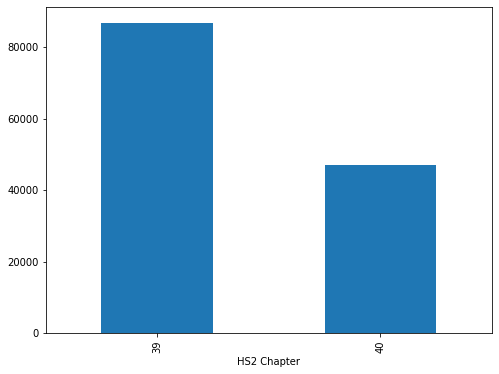

In [26]:
fig = plt.figure(figsize=(8,6))
df_sample.groupby('HS2 Chapter')['System Identity Id'].count().plot.bar(ylim=0)
plt.show()

In [27]:
df_sample_chapter_39_40_hscode_counts = df_sample.groupby('Cleaned_HS_Code').count()[['System Identity Id']].reset_index()

In [28]:
df_sample_chapter_39_40_hscode_counts.head()

,Cleaned_HS_Code,System Identity Id
0,390110,1000
1,390120,1000
2,390130,1000
3,390140,901
4,390190,1000


In [29]:
def set_bucket(val):
    if val < 100:
        return 'Less than 100'
    if val >= 100 and val < 1000:
        return 'Between 100 and 1000'
    return 'Greater than 1000'

df_sample_chapter_39_40_hscode_counts['Bucket'] = [set_bucket(int(x)) for x in df_sample_chapter_39_40_hscode_counts['System Identity Id']]

In [30]:
df_sample_chapter_39_40_hscode_counts.to_csv('data_2019_subset_chapter39_40_hscode_counts.csv')

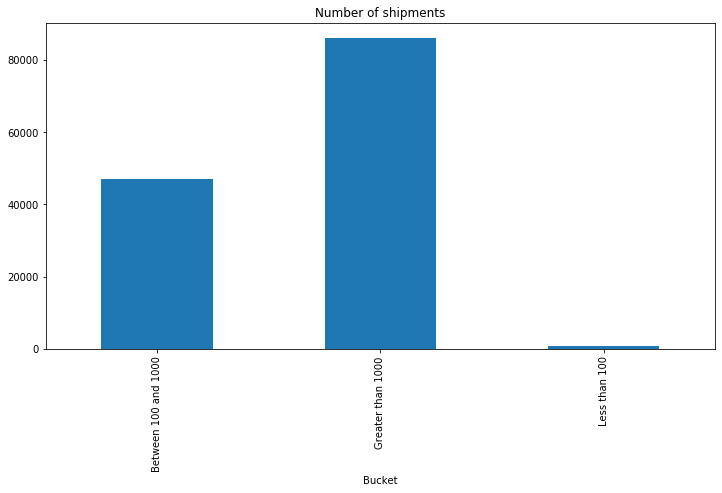

In [31]:
fig = plt.figure(figsize=(12,6))
df_sample_chapter_39_40_hscode_counts.groupby('Bucket').sum()['System Identity Id'].plot.bar(ylim=0)
plt.title("Number of shipments")
plt.show()

In [32]:
len(df_sample)

134035

In [33]:
df_sample['HS4'] = [str(x)[0:4] for x in df_sample['HS Code']]
df_sample.head()

,System Identity Id,Estimate Arrival Date,Actual Arrival Date,Bill of Lading,Master Bill of Lading,Bill Type Code,Carrier SASC Code,Vessel Country Code,Vessel Code,Vessel Name,...,HS Code Sure Level,CIF,Indicator of true supplier,Indicator of true buyer,END,Cleaned_HS_Code,HS_Code,Merged_Description,HS2 Chapter,HS4
8191698,6003201905010000485147,20190429,20190429,SUDU29297AGIX154,None,R,"SUDU, SUD HAMBURG/COLUMBUS LINE",SG,9283239,MONTE VERDE,...,8,1009800.0,Y,Y,END,390110,390110,"Polymers of ethylene, in primary forms ;Polyet...",39,3901
8021902,6003201904150000515332,20190412,20190412,CMDULHV2002586,None,R,"CMDU, COMPAGNIE MARITIME DAFFRETEMEN",GB,9317975,CMA CGM WHITE SHARK,...,8,0.0,Y,Y,END,390110,390110,"Polymers of ethylene, in primary forms ;Polyet...",39,3901
2399158,6003201907300000602584,20190729,20190729,MEDUMX419820,None,R,"MEDU, BCSL US-MED LINE LTD.",SG,9357949,MONTE TAMARO,...,8,2.17107E7,Y,Y,END,390110,390110,"Polymers of ethylene, in primary forms ;Polyet...",39,3901
6928440,6003201902180000481484,20190215,20190216,MEDUVI019658,None,R,"MEDU, BCSL US-MED LINE LTD.",US,9193264,MAERSK IDAHO,...,8,0.0,Y,Y,END,390110,390110,"Polymers of ethylene, in primary forms ;Polyet...",39,3901
4025462,6003201911060000667970,20191104,20191104,CGRWBAN66512,None,R,"CGRW, CG RAILWAY",SG,8106056,BANDA SEA,...,5,0.0,N,Y,END,390110,390110,"Polymers of ethylene, in primary forms ;Polyet...",39,3901


In [34]:
print("Unique HS6 {}".format(len(df_sample['HS Code'].unique())))
print("Unique HS4 {}".format(len(df_sample['HS4'].unique())))
print("Unique HS2 {}".format(len(df_sample['HS2 Chapter'].unique())))

Unique HS6 209
Unique HS4 43
Unique HS2 2


In [ ]:
#df_sample[['Product Desc', 'HS Code', 'Merged_Description']].sample(n=100, random_state=100).to_csv('sample_chap39_40.csv')

In [35]:
df_sample.to_parquet('/data/common/trade_data/2019_updated/data_samples_ignore_multiple_hscode/sample_ignore_multiple_hscode_chap39_40.parq')